In [181]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [182]:
from pandas_profiling import ProfileReport


In [183]:
df=pd.read_csv("Bankloan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [185]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [186]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [187]:
# In summary, the code line filters the DataFrame to retain only those rows where the 'Credit_History' column has a valid (non-null) value.
df = df[df['Credit_History'].notnull()]

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [189]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [191]:
df.shape

(564, 13)

In [192]:
df['Gender'].mode()[0]

'Male'

In [193]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17228\2932142326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17228\2932142326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=df['Married'].fillna(df['Married'].mode()[0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17228\2932142326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [194]:
df.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [195]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17228\1838336641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17228\1838336641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [196]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [197]:
X= df.drop('Loan_ID', axis = 1)


In [198]:
X = X.drop('Loan_Status', axis = 1)


In [199]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [200]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    object 
 1   Married            564 non-null    object 
 2   Dependents         564 non-null    object 
 3   Education          564 non-null    object 
 4   Self_Employed      564 non-null    object 
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [201]:
X = X.values
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [202]:
X.shape

(564, 11)

In [203]:
y = df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 564, dtype: object

In [204]:
!pip install imbalanced-learn


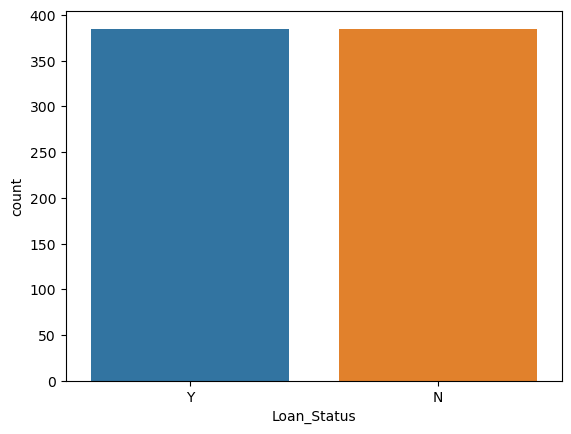

In [205]:
from imblearn.over_sampling import RandomOverSampler
X, y = RandomOverSampler(random_state=0).fit_resample(X, y)
ax = sns.countplot(x=y)

# ENCODING

In [206]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)


gender_mapping = {'Male': 0, 'Female': 1}
married_mapping = {'No': 0, 'Yes': 1}
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
education_mapping = {'Not Graduate': 0, 'Graduate': 1}
self_employed_mapping = {'No': 0, 'Yes': 1}
property_area_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
X[:, 0] = np.vectorize(gender_mapping.get)(X[:,0])
X[:, 1] = np.vectorize(married_mapping.get)(X[:,1])
X[:, 2] = np.vectorize(dependents_mapping.get)(X[:,2])
X[:, 3] = np.vectorize(education_mapping.get)(X[:, 3])
X[:, 4] = np.vectorize(self_employed_mapping.get)(X[:, 4])
X[:, 10] = np.vectorize(property_area_mapping.get)(X[:, 10])

In [207]:
X[:, 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [208]:
X[2]

array([0, 1, 0, 1, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2], dtype=object)

# SplitData

In [245]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# RandomForestClassifier

In [266]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],     # Number of trees in the forest
    'criterion': ['gini', 'entropy'],   # Split criterion
    'max_depth': [None, 5, 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']    # Number of features to consider when looking for the best split
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Access the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [270]:

clf = RandomForestClassifier(n_estimators=150, random_state=43)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9155844155844156


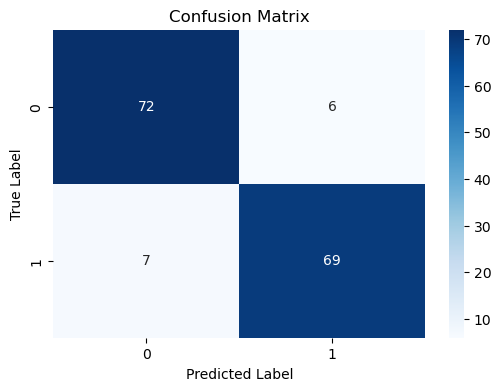

In [271]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [272]:
X

array([[0, 0, 0, ..., 360.0, 1.0, 2],
       [0, 1, 1, ..., 360.0, 1.0, 0],
       [0, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [0, 0, 0, ..., 180.0, 0.0, 2],
       [0, 1, 0, ..., 360.0, 0.0, 2],
       [0, 0, 0, ..., 360.0, 1.0, 0]], dtype=object)

# ROC_Curve

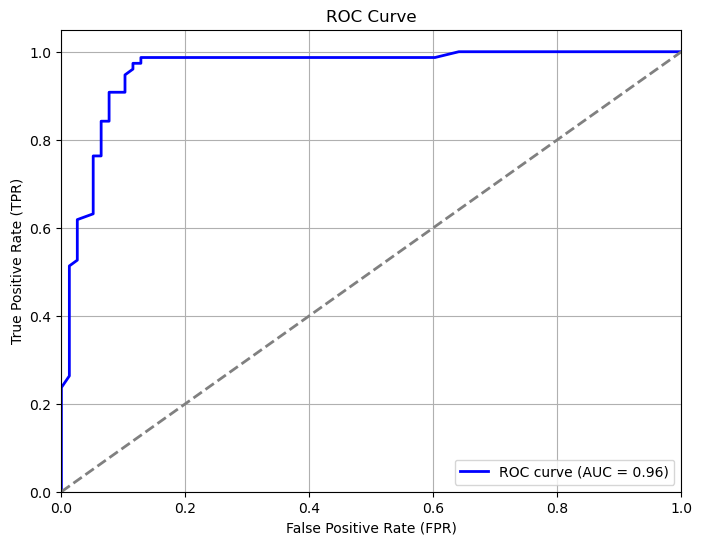

In [273]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning_Curve

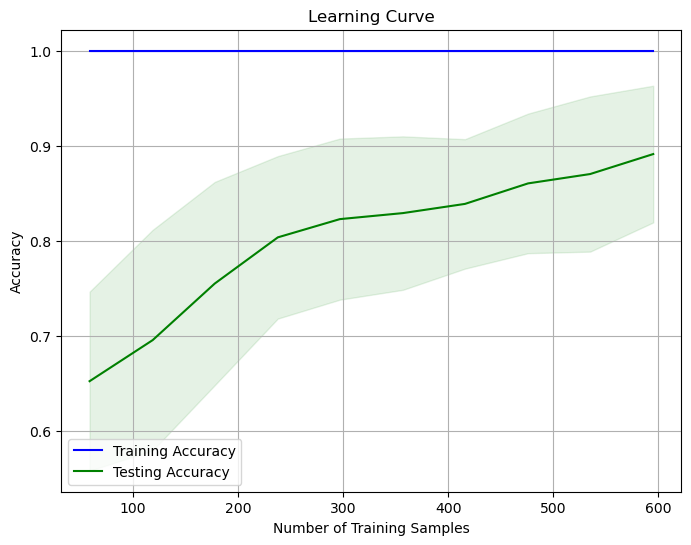

In [274]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=30, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='b')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
    plt.plot(train_sizes, test_mean, label='Testing Accuracy', color='g')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(clf, X_train, y_train)

# Test

In [275]:
gender_mapping = {'Male': 0, 'Female': 1}
married_mapping = {'No': 0, 'Yes': 1}
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
education_mapping = {'Not Graduate': 0, 'Graduate': 1}
self_employed_mapping = {'No': 0, 'Yes': 1}
property_area_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}

def predict_loan_eligibility():
    print("Please enter the following details:")
    Gender = input("Gender: ")
    print( Gender)
    Married = input("Married: ")
    Dependents = input("Dependents: ")
    Education = input("Education Status : ")
    Self_Employed = input("Self Employed: ")
    ApplicantIncome = int(input("ApplicantIncome: "))
    CoapplicantIncome = float(input("CoapplicantIncome: "))
    loan_amount = float(input("Loan Amount: "))
    Loan_Amount_Term = float(input("Loan Term (in months): "))
    Credit_History = float (input("Credit_History: "))
    Property_Area = input("Property Area: ")

    user_input_df = pd.DataFrame({
        'Gender': [Gender],
        'Married': [Married],
        'Dependents': [Dependents],
        'Education': [Education],
        'Self_Employed': [Self_Employed],
        'ApplicantIncome': [ApplicantIncome],
        'CoapplicantIncome': [CoapplicantIncome],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [Loan_Amount_Term],
        'Credit_History': [Credit_History],
        'Property_Area': [Property_Area]
    })
    
    user_input_df['Gender'] = user_input_df['Gender'].map(gender_mapping)
    user_input_df['Married'] = user_input_df['Married'].map(married_mapping)
    user_input_df['Dependents'] = user_input_df['Dependents'].map(dependents_mapping)
    user_input_df['Education'] = user_input_df['Education'].map(education_mapping)
    user_input_df['Self_Employed'] = user_input_df['Self_Employed'].map(self_employed_mapping)
    user_input_df['Property_Area'] = user_input_df['Property_Area'].map(property_area_mapping)



    prediction = clf.predict(user_input_df)

    if prediction[0] == 1:
        print("Congratulations! Your loan is likely to be approved.")
    else:
        print("Sorry, your loan application is likely to be rejected.")

predict_loan_eligibility()


Please enter the following details:
Gender: Male
Male
Married: Yes
Dependents: 2
Education Status : Graduate
Self Employed: No
ApplicantIncome: 7583
CoapplicantIncome: 0.0
Loan Amount: 187.0
Loan Term (in months): 360.0
Credit_History: 1.0
Property Area: Urban
Congratulations! Your loan is likely to be approved.


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [276]:
predict_loan_eligibility()


Please enter the following details:
Gender: Male
Male
Married: Yes
Dependents: 0
Education Status : Graduate
Self Employed: No
ApplicantIncome: 5849
CoapplicantIncome: 0.0
Loan Amount: 71.0
Loan Term (in months): 360.0
Credit_History: 1.0
Property Area: Urban
Congratulations! Your loan is likely to be approved.


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [277]:
predict_loan_eligibility()


Please enter the following details:
Gender: Male
Male
Married: Yes
Dependents: 1
Education Status : Graduate
Self Employed: No
ApplicantIncome: 4583
CoapplicantIncome: 1508.0
Loan Amount: 128.0
Loan Term (in months): 360.0
Credit_History: 1.0
Property Area: Rural
Sorry, your loan application is likely to be rejected.


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [278]:
predict_loan_eligibility()


Please enter the following details:
Gender: Male
Male
Married: Yes
Dependents: 1
Education Status : Graduate
Self Employed: No
ApplicantIncome: 5955
CoapplicantIncome: 5625
Loan Amount: 315
Loan Term (in months): 360
Credit_History: 1
Property Area: Urban
Congratulations! Your loan is likely to be approved.


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [279]:
predict_loan_eligibility()



Please enter the following details:
Gender: Male
Male
Married: No
Dependents: 0
Education Status : Not Graduate
Self Employed: No
ApplicantIncome: 7333
CoapplicantIncome: 0
Loan Amount: 120
Loan Term (in months): 360
Credit_History: 1
Property Area: Rural
Sorry, your loan application is likely to be rejected.


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
